#  Kanye West's Tweets scraping, EDA and sentiment analysis about Kanye's bipolar
tl;dr: Kanye is bipolar, and his Twitter account said a lot about his bipolar disorder cycle. He needs therapist.

## 0. Pulling data down

In [2]:
#import packages for the projects
# import snscrape.modules.twitter as sntwitter
import pandas as pd

#packages for visualizing
import matplotlib.pyplot as plt #dont ask me I have to use this since idk how to use the hvplot
import seaborn as sns


# from wordcloud import WordCloud as wc, STOPWORDS, ImageColorGenerator
# cant import wordcloud locally

#packages for NLP
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #VADER for real

#for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose

In [313]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
#scraping function

query = "(from:kanyewest)" #From Kanye West (please Kanye back to Twitter please)
tweets = []


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    tweets.append([tweet.id, tweet.date, tweet.likeCount, tweet.retweetCount, tweet.replyCount, tweet.content])
        
df = pd.DataFrame(tweets, columns=['id', 'date', 'likes', 'retweet', 'reply', 'tweet'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   id       1667 non-null   int64              
 1   date     1667 non-null   datetime64[ns, UTC]
 2   likes    1667 non-null   int64              
 3   retweet  1667 non-null   int64              
 4   reply    1667 non-null   int64              
 5   tweet    1667 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 78.3+ KB


In [13]:
df

,id,date,likes,retweet,reply,tweet
0,1323914087340781569,2020-11-04 09:04:50+00:00,420476,42010,36798,KANYE 2024 https://t.co/Zm2pKcn12t
1,1323730046125699072,2020-11-03 20:53:31+00:00,221039,8200,8720,I VOTED 🇺🇸 https://t.co/hlgIJUST4x
2,1323729643828989953,2020-11-03 20:51:55+00:00,90010,3134,3592,KANYE2020 🇺🇸 https://t.co/3kd8vrrHZQ
3,1323729368594575361,2020-11-03 20:50:49+00:00,70670,2062,2960,🕊 https://t.co/tFqpKyQzkY
4,1323727338387902465,2020-11-03 20:42:45+00:00,78810,3749,7570,The first vote of my life We are here ...
...,...,...,...,...,...,...
1662,986302853047308288,2018-04-17 17:58:19+00:00,115698,30014,680,try to avoid any contractual situation where y...
1663,986302193715294208,2018-04-17 17:55:42+00:00,176979,57451,807,You have to protect your ability to create at ...
1664,986302131106975749,2018-04-17 17:55:27+00:00,142438,46508,818,As a creative your ideas are your strongest fo...
1665,985672020590546945,2018-04-16 00:11:37+00:00,205583,58953,2349,often people working with the existing conscio...


In [ ]:
df.to_csv("ye-tweets.csv")

# Kanye's tweets EDA
Yes, this would be the overview of the mental health of Kanye West when this dawg using Twitter.

Questions would be asked: 

1. Overview of Kanye's Tweets: Reaction from the audience, and the how frequent Kanye uses Twitter
2. Did Kanye love himself? (Occurence counter for keywords)
3. How was Kanye over the time? (Good morning Kanye!)

## 1. Kanye overview
We will look at: 
- Numbers of Tweets per day
- Numbers of Reaction/Like/Retweet per day
- Retention of Kanye for Twitter
- Top Tweets from Ye and when?

In [3]:
#I did extract the data to csv file and read data from that, to not in the situation that i restart the shell and i have to scrape again the whole data from Twitter.
df = pd.read_csv('ye-tweets.csv')
df.head()

,Unnamed: 0,id,date,likes,retweet,reply,tweet
0,0,1323914087340781569,2020-11-04 09:04:50+00:00,420435,42013,36796,KANYE 2024 https://t.co/Zm2pKcn12t
1,1,1323730046125699072,2020-11-03 20:53:31+00:00,220999,8199,8721,I VOTED 🇺🇸 https://t.co/hlgIJUST4x
2,2,1323729643828989953,2020-11-03 20:51:55+00:00,89995,3134,3592,KANYE2020 🇺🇸 https://t.co/3kd8vrrHZQ
3,3,1323729368594575361,2020-11-03 20:50:49+00:00,70659,2062,2960,🕊 https://t.co/tFqpKyQzkY
4,4,1323727338387902465,2020-11-03 20:42:45+00:00,78800,3748,7570,The first vote of my life We are here ...


In [4]:
#drop the index column 
df.drop("Unnamed: 0", inplace=True, axis=1)

#date-time extraction
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,id,date,likes,retweet,reply,tweet,year,month
0,1323914087340781569,2020-11-04 09:04:50+00:00,420435,42013,36796,KANYE 2024 https://t.co/Zm2pKcn12t,2020,11
1,1323730046125699072,2020-11-03 20:53:31+00:00,220999,8199,8721,I VOTED 🇺🇸 https://t.co/hlgIJUST4x,2020,11
2,1323729643828989953,2020-11-03 20:51:55+00:00,89995,3134,3592,KANYE2020 🇺🇸 https://t.co/3kd8vrrHZQ,2020,11
3,1323729368594575361,2020-11-03 20:50:49+00:00,70659,2062,2960,🕊 https://t.co/tFqpKyQzkY,2020,11
4,1323727338387902465,2020-11-03 20:42:45+00:00,78800,3748,7570,The first vote of my life We are here ...,2020,11


In [5]:
df['retweet'].describe()

count      1667.000000
mean       9466.496101
std       19393.305714
min          41.000000
25%         909.000000
50%        3232.000000
75%        8483.000000
max      247509.000000
Name: retweet, dtype: float64

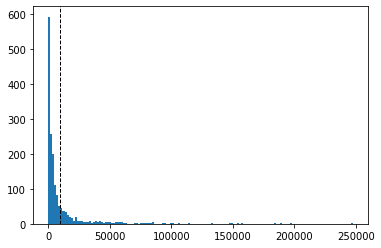

In [6]:
#checking the plot for the retweet
plt.plot(figsize=(20,10))
plt.hist(df['retweet'], bins=150)
plt.axvline(df['retweet'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

In [7]:
#Kanye numbers of Tweets per 
df_time_metrics = df[["date", "id", "retweet", "likes", "reply"]]
df_time_metrics

df_time_metrics.date = pd.DatetimeIndex(df_time_metrics.date)

# The date time dataframe
tweet_per_day = pd.DataFrame()

tweet_per_day['tweet_count'] = df_time_metrics.groupby(pd.Grouper(key='date', freq='D'))['id'].count()
tweet_per_day["likes"] = df_time_metrics.groupby(pd.Grouper(key='date', freq='D'))['likes'].sum()
tweet_per_day["reply"] = df_time_metrics.groupby(pd.Grouper(key='date', freq='D'))['reply'].sum()
tweet_per_day["retweet"] = df_time_metrics.groupby(pd.Grouper(key='date', freq='D'))['retweet'].sum()
tweet_per_day.reset_index(inplace=True)

tweet_per_day


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4992\3633463109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_metrics.date = pd.DatetimeIndex(df_time_metrics.date)


,date,tweet_count,likes,reply,retweet
0,2018-04-16 00:00:00+00:00,2,352524,3653,104712
1,2018-04-17 00:00:00+00:00,8,1396935,7691,517165
2,2018-04-18 00:00:00+00:00,19,2446161,15884,754149
3,2018-04-19 00:00:00+00:00,12,2234450,21926,774753
4,2018-04-20 00:00:00+00:00,13,805438,6628,211586
...,...,...,...,...,...
929,2020-10-31 00:00:00+00:00,1,21402,1827,1242
930,2020-11-01 00:00:00+00:00,0,0,0,0
931,2020-11-02 00:00:00+00:00,1,248813,2783,17783
932,2020-11-03 00:00:00+00:00,16,1351893,52650,111617


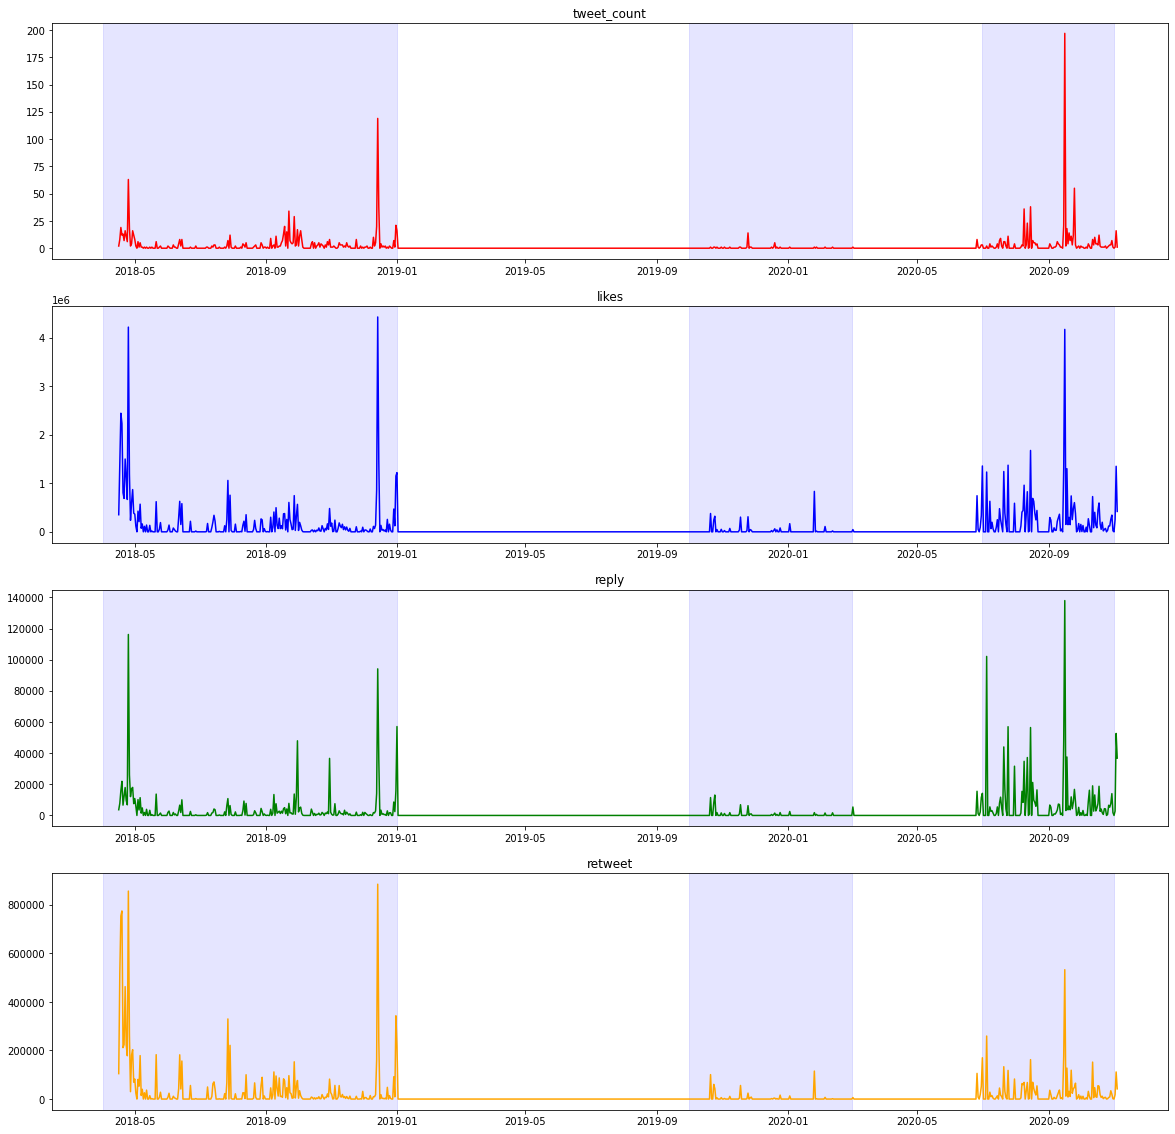

In [8]:
#plot of the Kanye's timeline
# plt.figure(figsize=(20,10))
# plt.plot(tweet_per_day['date'], tweet_per_day['tweet_count'], label='tweet per day')
# plt.plot(tweet_per_day['date'], tweet_per_day['likes'], label='likes per day')
# plt.plot(tweet_per_day['date'], tweet_per_day['reply'], label='reply per day')
# plt.plot(tweet_per_day['date'], tweet_per_day['retweet'], label='retweet per day')
# plt.legend()
# plt.show()


# plt.subplot(2,2,1)
graph_tags = ['tweet_count', 'likes', 'reply', 'retweet']
color = ['red', 'blue', 'green', 'orange']

def plot_ye_by_time(tags):
    plt.figure(figsize=(20,20))
    for i in range(0, len(tags)):
        plt.subplot(len(tags), 1, i+1)
        plt.title(graph_tags[i])
        plt.plot(tweet_per_day['date'],tweet_per_day[graph_tags[i]], color=color[i])
        plt.axvspan('2018-04', '2019-01', color="blue", alpha=0.1)
        plt.axvspan('2019-10', '2020-03', color="blue", alpha=0.1)
        plt.axvspan('2020-07', '2020-11', color="blue", alpha=0.1)
    plt.show()

plot_ye_by_time(graph_tags)

#in this cases could change by using the hvplot, and then can change the plot in term of the insight per day, just fixed this after this

For the insight from the lineplots and correlation, we have:
- There are 3 main clusters of tweet that Ye got: from 4/2018 to near 1/2019; from 10/2019 to somewhere near around 1/2020 and from 7/2020 to 10/2020.They did talk a lot about how Kanye got his affection to the community on Twitter with some main events could be told:
    - 1st cluster: Ye/Yahdi/Kids See Ghosts era, all three new albums was gonna be released.
    - 2nd cluster: Pre-president election.
    - 3rd cluster: 2020 president election.
    
-> These are the hyperactive time range of Kanye since after each cycle, there would be an event that his depression kicks in, and he has to stop using Twitter. 

[]

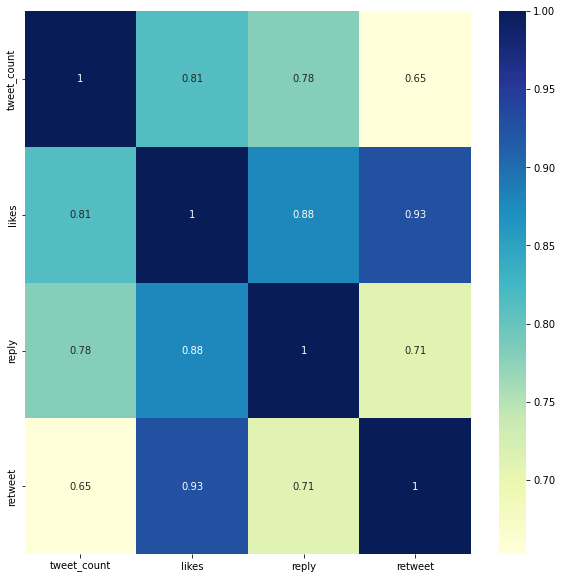

In [9]:
#correlation for the metrics of numbers of tweet per day, total likes, retweet and replies per day
df_metrics = tweet_per_day[['tweet_count', 'likes', 'reply', 'retweet']]

plt.figure(figsize=(10,10))
sns.heatmap(df_metrics.corr(), cmap="YlGnBu", annot=True)
plt.plot()

Kanye is famous, the fact is told from the correlation table when all of the metrics would tend to increase when the number of tweets per day of Kanye increased (having the correlation is positive, and close to 1). We have not check for the public reaction toward Ye's tweets so this would be included in the following parts.

In [10]:
#Top five of the most popular Tweets of Kanye over time - Count by likes
df_likes = df.sort_values(by='likes', ascending=False)
df_likes.head(10)

,id,date,likes,retweet,reply,tweet,year,month
665,1279575273365594112,2020-07-05 00:38:13+00:00,1079515,247509,98501,We must now realize the promise of America by ...,2020,7
686,1221558611320528896,2020-01-26 22:20:43+00:00,833942,115247,1810,"Kobe, We love you brother\n\nWe’re praying for...",2020,1
668,1278353774671802369,2020-07-01 15:44:25+00:00,788012,101991,8893,When you go to your boys house and you’re both...,2020,7
236,1306280073209589760,2020-09-16 17:13:33+00:00,718720,157219,42132,Trust me ... I WONT STOP https://t.co/RmVkqrSa4F,2020,9
1366,1022952843563556864,2018-07-27 21:12:18+00:00,619118,196450,6620,How to NOT kill yourself pt 1\n\nAvoid being a...,2018,7
666,1278408410904629252,2020-07-01 19:21:31+00:00,502186,60903,4226,https://t.co/wJLvIufr2u https://t.co/PfQENqgGou,2020,7
630,1285420423056748546,2020-07-21 03:44:45+00:00,449146,42464,17595,Ima focus on the music now,2020,7
1630,987051337782181889,2018-04-19 19:32:32+00:00,443884,189042,5842,me and Cudi album June 8th,2018,4
1636,986759302311395328,2018-04-19 00:12:05+00:00,435930,184044,2552,if you wanna see the true character of person ...,2018,4
610,1287128322959237120,2020-07-25 20:51:20+00:00,423852,30895,15134,I would like to apologize to my wife Kim for g...,2020,7


In [11]:
#Top five of the most popular Tweets of Kanye over time - Count by reply
df_reply = df.sort_values(by='reply', ascending=False)
df_reply.head(10)

,id,date,likes,retweet,reply,tweet,year,month
665,1279575273365594112,2020-07-05 00:38:13+00:00,1079515,247509,98501,We must now realize the promise of America by ...,2020,7
236,1306280073209589760,2020-09-16 17:13:33+00:00,718720,157219,42132,Trust me ... I WONT STOP https://t.co/RmVkqrSa4F,2020,9
0,1323914087340781569,2020-11-04 09:04:50+00:00,420435,42013,36796,KANYE 2024 https://t.co/Zm2pKcn12t,2020,11
1126,1046466533973590016,2018-09-30 18:27:18+00:00,88217,17306,31735,this represents good and America becoming whol...,2018,9
1027,1057382916760707072,2018-10-30 21:25:07+00:00,286898,58262,30438,My eyes are now wide open and now realize I’ve...,2018,10
1512,989272340432240641,2018-04-25 22:38:00+00:00,217963,54904,23585,Obama was in office for eight years and nothin...,2018,4
1543,989179757651574784,2018-04-25 16:30:06+00:00,252307,54537,23349,You don't have to agree with trump but the mob...,2018,4
630,1285420423056748546,2020-07-21 03:44:45+00:00,449146,42464,17595,Ima focus on the music now,2020,7
87,1314407219434196993,2020-10-09 03:27:56+00:00,105998,9508,15175,Friends writing me in 🕊 https://t.co/bC4NvFBWB5,2020,10
610,1287128322959237120,2020-07-25 20:51:20+00:00,423852,30895,15134,I would like to apologize to my wife Kim for g...,2020,7


In [12]:
#Top five of the most popular Tweets of Kanye over time - Count by retweet
df_retweet = df.sort_values(by='retweet', ascending=False)
df_retweet.head(10)

,id,date,likes,retweet,reply,tweet,year,month
665,1279575273365594112,2020-07-05 00:38:13+00:00,1079515,247509,98501,We must now realize the promise of America by ...,2020,7
1366,1022952843563556864,2018-07-27 21:12:18+00:00,619118,196450,6620,How to NOT kill yourself pt 1\n\nAvoid being a...,2018,7
1630,987051337782181889,2018-04-19 19:32:32+00:00,443884,189042,5842,me and Cudi album June 8th,2018,4
1636,986759302311395328,2018-04-19 00:12:05+00:00,435930,184044,2552,if you wanna see the true character of person ...,2018,4
236,1306280073209589760,2020-09-16 17:13:33+00:00,718720,157219,42132,Trust me ... I WONT STOP https://t.co/RmVkqrSa4F,2020,9
743,1079833477808148480,2018-12-31 20:15:38+00:00,386676,154541,3903,If I got any cooler I would freeze to death,2018,12
1439,993212368225124353,2018-05-06 19:34:16+00:00,349799,148923,4745,naps are awesome,2018,5
1402,1006680756779798528,2018-06-12 23:32:50+00:00,291722,147247,3199,I be taking naps,2018,6
1638,986687322140721152,2018-04-18 19:26:04+00:00,290042,132764,1613,don't trade your authenticity for approval,2018,4
686,1221558611320528896,2020-01-26 22:20:43+00:00,833942,115247,1810,"Kobe, We love you brother\n\nWe’re praying for...",2020,1


Overall we have:
- For the most liked Tweet of Kanye, it's mostly came from the President Election campaign of Ye in 2020. This was boosted by Ye's team a lot in the teams.
- Kanye before the election camapgin, got a lot of controversial Tweets about politic aspects with high replied numbers.
- He got a publically suicidal behavior in Twitter which got a lot of concern. And he also got more Tweet when he's in the extreme states (both extremely high or suicidal)
-> WE CAN BUILD A MODEL FOR THE MOOD OF KANYE WEST UH OHHHHHHHHHHHHHHHHHHHHHHHHHHHH

## 2. Did Kanye love himself?

In this part I will dig down into the tweet analyzing for Kanye. This will answer these questions:
- The most popular keywords that Ye used in the time of the (Wordcloud)
- How was Kanye obsessed with God and himself? (Word counter)

### How to preprocessing the text in the Tweets of Ye
1. Remove all the links from the text (the REGEX for the link: `'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'`)
2. Remove all the tags from the text (kinda be like something @kanyewest, dunno the regex, might find later)
3. Remove special character of the text (regex: nah don't use regex, use something else)
4. Tokenizing and lemmatizing the text


In [13]:
#maybe I gotta loop through the whole column after detaching it on another dataframe -> get it back when we're ready
tweet_text = pd.DataFrame()
tweet_text['tweets'] = df['tweet']
tweet_text['tweets'] = tweet_text['tweets'].astype(str)

tweet_text

,tweets
0,KANYE 2024 https://t.co/Zm2pKcn12t
1,I VOTED 🇺🇸 https://t.co/hlgIJUST4x
2,KANYE2020 🇺🇸 https://t.co/3kd8vrrHZQ
3,🕊 https://t.co/tFqpKyQzkY
4,The first vote of my life We are here ...
...,...
1662,try to avoid any contractual situation where y...
1663,You have to protect your ability to create at ...
1664,As a creative your ideas are your strongest fo...
1665,often people working with the existing conscio...


In [14]:
lemmer = WordNetLemmatizer()

def tweet_clean(text): #clean to use later with the lambda function
    #find out the link, and remove it
    text1 = re.sub('(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])', '', text) #replacce the link with nothing, remove it
    #find out the tags (regex might be @sdjfhkfhda with the space after), and remove it
    text2 = re.sub('^@?(\w){1,15}$', '', text1) #replace the username/tags to '' kinda remove it
    text3 = re.sub('/[^a-zA-Z ]/g', ' ', text2)
    return text3
    #wait how about the tags this mad guy used? nah i dont want to set anything like a list to append things in this function so yeah

tweet_text['tweets'] = tweet_text.tweets.apply(lambda x: tweet_clean(str(x)))
tweet_text['tweets'] = tweet_text.tweets.apply(lambda x: word_tokenize(x))
tweet_text['tweets'] = tweet_text.tweets.apply(lambda x: [lemmer.lemmatize(y) for y in x])
tweet_text['tweets'] = tweet_text.tweets.apply(lambda x: ' '.join(x))

tweet_text.head()

,tweets
0,KANYE 2024
1,I VOTED 🇺🇸
2,KANYE2020 🇺🇸
3,🕊
4,The first vote of my life We are here to serve...


In [15]:
#word counter forming
large_string = ' '.join(tweet_text.tweets)

stopwords_li = stopwords.words('english')
large_text = word_tokenize(large_string.lower())
token = [token for token in large_text if token not in stopwords_li]
wdist = FreqDist(large_text)
common = wdist.most_common(200)

print(common)
# print(large_text)

[('the', 651), ('.', 541), ('i', 538), ('to', 486), ('and', 394), ('’', 380), ('a', 345), ('we', 284), ('you', 270), ('is', 266), ('of', 253), ('in', 246), ('for', 187), ('my', 176), ('...', 175), ('this', 166), ('love', 157), ('with', 152), ('it', 144), ('me', 144), ('s', 143), ('that', 130), ('be', 127), ('on', 126), ('are', 123), ('have', 111), ('all', 108), ('people', 99), ('will', 92), ('not', 92), ('our', 89), ('t', 87), (',', 86), ('so', 85), ('your', 81), ('at', 80), ('do', 77), ('need', 75), ('when', 74), ('god', 64), ('no', 63), ('like', 59), ('from', 59), ('just', 58), ('but', 57), ('can', 56), ('m', 55), ('how', 49), ('time', 48), ('re', 48), ('world', 47), ('or', 47), ('now', 46), ('up', 46), ('about', 46), ('they', 45), ('more', 45), ('by', 45), ('@', 45), ('what', 45), ('never', 44), ('let', 44), ('life', 43), ("'s", 43), ('wa', 43), ('new', 43), ('!', 43), ('he', 43), ('one', 43), ('if', 43), ('get', 41), ('would', 40), ('music', 40), ('been', 39), ('everyone', 39), ('y

After having the frequency dictionary of the words in Ye's tweets, I would take a little bit at that since there would be some keywords that significant for Ye that I think it would be suitable for him.
- Kanye is a music producer/rapper with notorious hits (and scandals), so I would think he has to shout his name for many times, and talk a lot about music industry (keywords: kanye, ye, great, love, music).
- He is proud of his family and himself, and he also owned a brand called Yeezy (which is the combination of Ye and Jesus), which reflected his main religion (Christian) in all of his works (keywords: god, jesus, family, black, yeezy, yzy).
- He might care about American (since we all know Ye got his election campaign in 2020 for president) -> keywords: american, america, usa, us

In [16]:
#kanye, by keywords
li_key = ['kanye', 'ye', 'god', 'jesus', 'great', 'love', 'family', 'black', 'music', 'american', 'america', 'usa', 'us', 'yeezy', 'yzy']
li_freq = []

for item in li_key:
    li_freq.append(wdist.get(item))

kanye_freq = pd.DataFrame({'word': li_key, 'frequency': li_freq})
kanye_freq


,word,frequency
0,kanye,17
1,ye,21
2,god,64
3,jesus,24
4,great,17
5,love,157
6,family,32
7,black,16
8,music,40
9,american,1


For the insights from the initial hypotheses we got: 
- Yes, Kanye did not really talk about America that much.
- He did really got a strong faith in religious topics and influenced from it for referencing a lot about Jesus and god.
- He did really great to be the representative one for his black communities and his own family for many topics with the keywords.

## 3. Sentiment analysis model for Kanye West
I bet I could make the model of the high-low cycle of Kanye based on Twitter

VADER explaination: 
VADER is a lexicon and rule-based sentiment analusis tool that specifically attuned to sentiments expressed in social media ([Source](https://analyticsindiamag.com/sentiment-analysis-made-easy-using-vader/#:~:text=Introducing%20VADER&text=It%20is%20used%20for%20sentiment,also%20the%20intensity%20of%20emotion.)). VADER would return the sentiment score of the following categories:
- Positive
- Negative
- Neutral
- Compound

The compounded score is the sum of positive, negative and neutral scorces which is normalized between -1 (the most extreme negative) and 1 (the most extreme positive). We would use the compound value in this report as the main metrics to evaluate the overall a Tweet for the time-series model.

We would analyze this with the assumption that his bipolar disorder got the seasonal cycle.

In [17]:
#using VADER to create a lambda function bla bla shit gotta be real bro
sentiment = SentimentIntensityAnalyzer()

def sentiment_scores(x):
    sentiment_dict = sentiment.polarity_scores(str(x))
    return sentiment_dict['compound']

#the reason is i have to use the sentiment score on the old dataframe, not the analyzed one is VADER could signified the uses of icon and the special characters (like ???) to rate the sentiment score 

df['sentiment_score'] = df['tweet'].apply(lambda x: sentiment_scores(x))
df

,id,date,likes,retweet,reply,tweet,year,month,sentiment_score
0,1323914087340781569,2020-11-04 09:04:50+00:00,420435,42013,36796,KANYE 2024 https://t.co/Zm2pKcn12t,2020,11,0.0000
1,1323730046125699072,2020-11-03 20:53:31+00:00,220999,8199,8721,I VOTED 🇺🇸 https://t.co/hlgIJUST4x,2020,11,0.0000
2,1323729643828989953,2020-11-03 20:51:55+00:00,89995,3134,3592,KANYE2020 🇺🇸 https://t.co/3kd8vrrHZQ,2020,11,0.0000
3,1323729368594575361,2020-11-03 20:50:49+00:00,70659,2062,2960,🕊 https://t.co/tFqpKyQzkY,2020,11,0.0000
4,1323727338387902465,2020-11-03 20:42:45+00:00,78800,3748,7570,The first vote of my life We are here ...,2020,11,0.3182
...,...,...,...,...,...,...,...,...,...
1662,986302853047308288,2018-04-17 17:58:19+00:00,115692,30013,680,try to avoid any contractual situation where y...,2018,4,-0.2960
1663,986302193715294208,2018-04-17 17:55:42+00:00,176971,57450,807,You have to protect your ability to create at ...,2018,4,0.7184
1664,986302131106975749,2018-04-17 17:55:27+00:00,142434,46508,818,As a creative your ideas are your strongest fo...,2018,4,0.7003
1665,985672020590546945,2018-04-16 00:11:37+00:00,205577,58952,2349,often people working with the existing conscio...,2018,4,0.8768


In [18]:
#date and sentiment score groupby -> yeah fuck then
df_sentiment = df[['date', 'sentiment_score']]
df_sentiment.date = pd.DatetimeIndex(df_sentiment.date)

sentiment_by_date = pd.DataFrame()
sentiment_by_date['sentiment_score'] = df_sentiment.groupby(pd.Grouper(key='date', freq='M'))['sentiment_score'].mean()
sentiment_by_date.reset_index(inplace=True)
sentiment_by_date['sentiment_score'].fillna(float(0), inplace=True)

sentiment_by_date.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4992\4147471614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment.date = pd.DatetimeIndex(df_sentiment.date)


,date,sentiment_score
0,2018-04-30 00:00:00+00:00,0.226169
1,2018-05-31 00:00:00+00:00,0.203584
2,2018-06-30 00:00:00+00:00,-0.013436
3,2018-07-31 00:00:00+00:00,0.299109
4,2018-08-31 00:00:00+00:00,0.226303


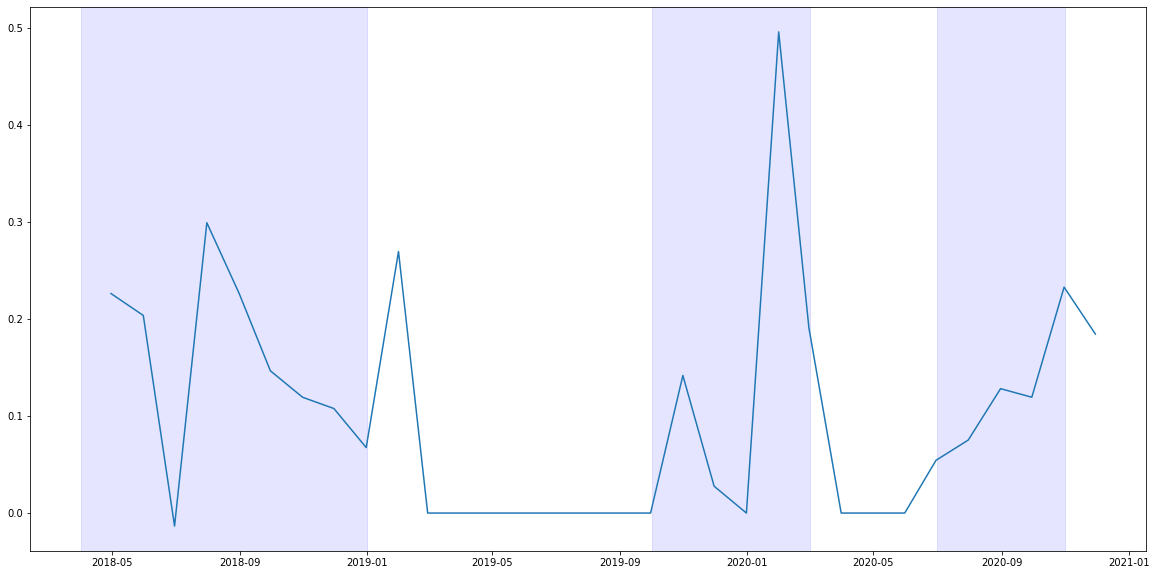

In [27]:
plt.figure(figsize=(20,10))
plt.plot(sentiment_by_date['date'], sentiment_by_date['sentiment_score'])
plt.axvspan('2018-04', '2019-01', color="blue", alpha=0.1)
plt.axvspan('2019-10', '2020-03', color="blue", alpha=0.1)
plt.axvspan('2020-07', '2020-11', color="blue", alpha=0.1)
plt.show()

From now on, the trend of Kanye's sentiments would be breakdown to the season by using `statsmodels.tsa.seasonal`.


In [20]:
sentiment_by_date['fixed_score'] = sentiment_by_date['sentiment_score'].apply(lambda x: x + 1.0) #plus 1 for the positive sign in the whole column to decomposition
sentiment_by_date.index = pd.DatetimeIndex(sentiment_by_date.date)
sentiment_by_date

result = seasonal_decompose(sentiment_by_date['fixed_score'], model='multiplicable')

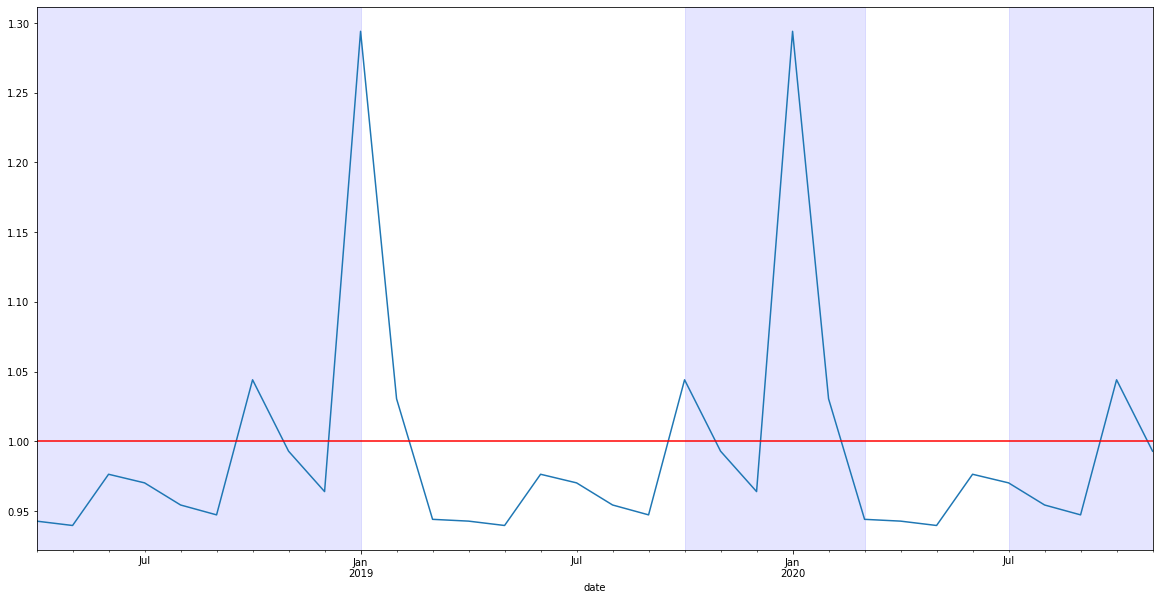

In [26]:
#Kanye's biploar, pattern based on the clusters above
plt.figure(figsize=(20,10))
result.seasonal.plot()
plt.axhline(y=1.0, color='r')
plt.axvspan('2018-04', '2019-01', color="blue", alpha=0.1)
plt.axvspan('2019-10', '2020-03', color="blue", alpha=0.1)
plt.axvspan('2020-07', '2020-11', color="blue", alpha=0.1)
plt.show()

Yeah we got the Kanye's bipolar cycle: 
- The span of each bipolar cycle of Kanye shown on Twitter would last for approximately 6 months, in each cycle there would 3 times Ye got extreme Tweets (Actually we could consider there is 4 times: 2 highs 2 lows, the final lows would be his disappearance by not using Twitter).
- First, he did something really stupid by getting his first high, and then there would be the negative response of him to his audience's responses (first low), and his ego kicked in (the second and the highest high), and he disappeared from Twitter for having bad reputation + bad mental health (the flatten of the Tweet/second low).
- The red line (`y = 1.0`) is the value that I plus for the positive value prediction.

-> HE SHOULD GET HIS THERAPIST FOR REAL.